# M2: Process and Tooling & M3: Model Experimentation and Packaging

# Flower Class Prediction using Iris dataset

## Group Member Names:
1. 2023aa05812 - SATHISH N M
2. 2023aa05813 - ROBERTJOHNSON S
3. 2023aa05698 - SATHISH KUMAR .S
4. 2023aa05208 - PALLAVI BONDA

**Objective:**

The primary goal of this project is to leverage machine learning techniques to build a classification model that can accurately identify the species of iris flowers based on their measurements. The model aims to automate the classification process, offering a practical solution for identifying iris species.

**Key Project Details:**

- Iris flowers have three species: setosa, versicolor, and virginica.
- These species can be distinguished based on measurements such as sepal length, sepal width, petal length, and petal width.
- The project involves training a machine learning model on a dataset that contains iris flower measurements associated with their respective species.
- The trained model will classify iris flowers into one of the three species based on their measurements.

# Dataset Information

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Attribute Information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica

# Import modules

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

# Loading the dataset

In [5]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# delete a column
df = df.drop(columns = ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
# to display stats about data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# to basic info about datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
# to display no. of samples on each class
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

# Preprocessing the dataset

In [11]:
# check for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Exploratory Data Analysis

<Axes: >

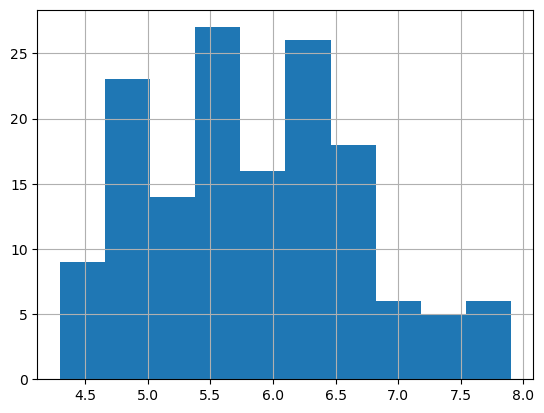

In [13]:
# histograms
df['SepalLengthCm'].hist()

<Axes: >

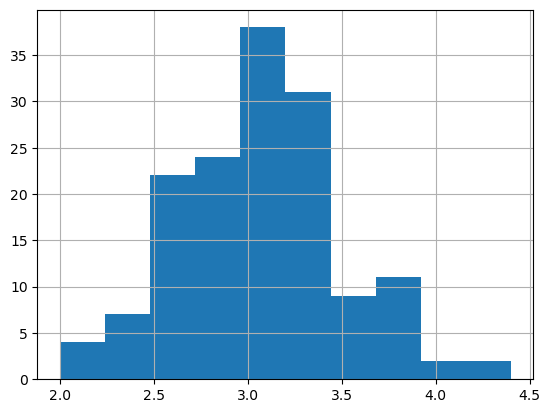

In [14]:
df['SepalWidthCm'].hist()

<Axes: >

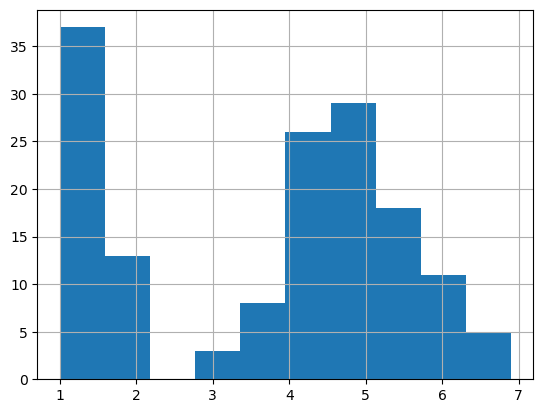

In [15]:
df['PetalLengthCm'].hist()

<Axes: >

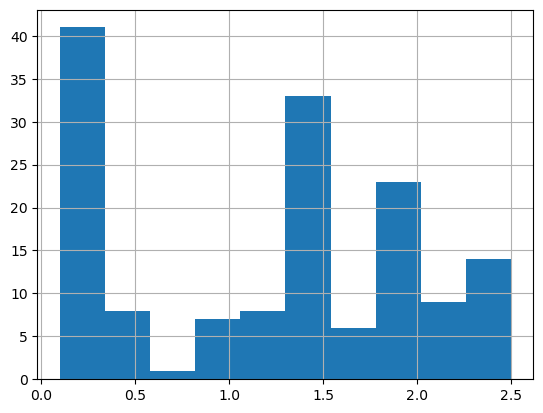

In [16]:
df['PetalWidthCm'].hist()

In [17]:
# scatterplot
colors = ['red', 'orange', 'blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

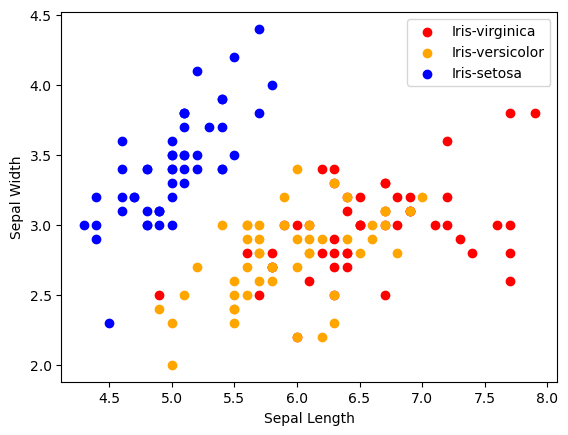

In [18]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

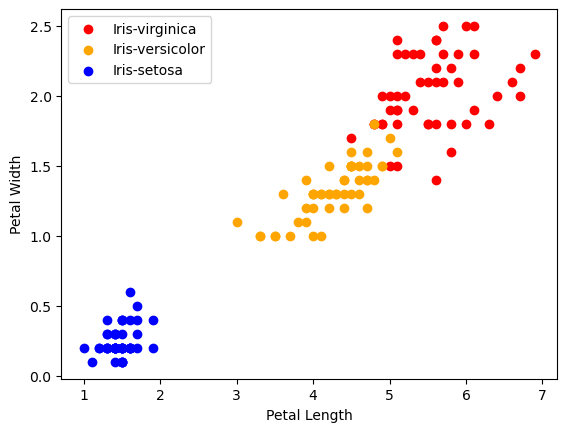

In [19]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

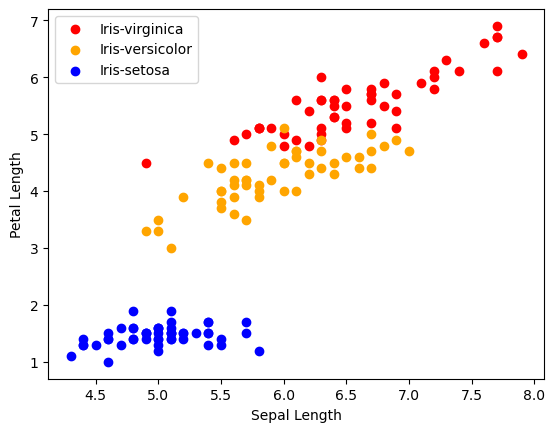

In [20]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

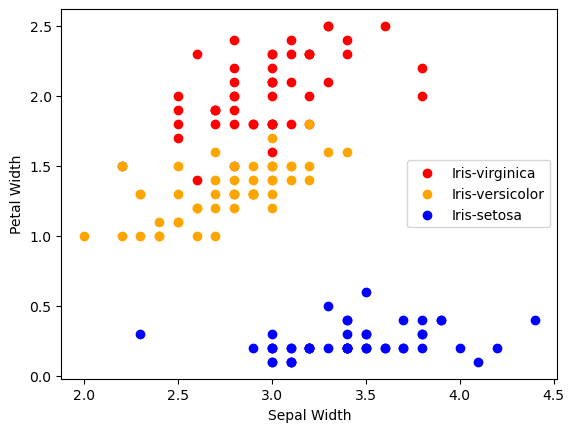

In [21]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

In [22]:
my_df = df

In [23]:
df = df.select_dtypes(exclude=[object])

# Coorelation Matrix

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. If two varibles have high correlation, we can neglect one variable from those two.

In [25]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

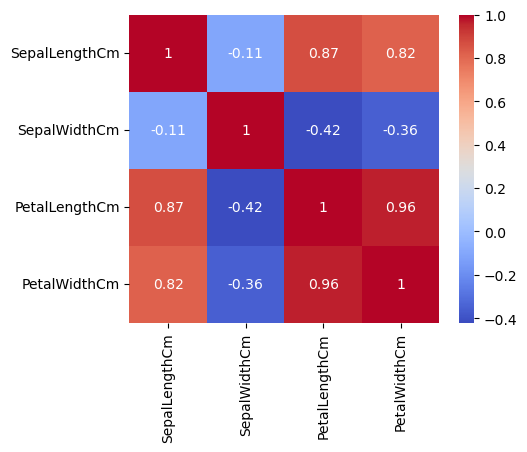

In [26]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

# Label Encoder

In machine learning, we usually deal with datasets which contains multiple labels in one or more than one columns. These labels can be in the form of words or numbers. Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [29]:
df = my_df
df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [30]:
# Defining the X and y
x=df.drop(columns=['Species'], axis=1)
y=df['Species']

In [31]:
# Splitting the data to train and test
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3)

# Model Training

### Cross- Validation & Hyperparameter Tuning

## ML Model Implementation

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
# Library used for ML Model implementation
from sklearn.linear_model import LogisticRegression
def evaluate_model(model, x_train, x_test, y_train, y_test):
    '''The function will take model, x train, x test, y train, y test
    and then it will fit the model, then make predictions on the trained model,
    it will then print roc-auc score of train and test, then plot the roc, auc curve,
    print confusion matrix for train and test, then print classification report for train and test,
    then plot the feature importances if the model has feature importances,
    and finally it will return the following scores as a list:
    recall_train, recall_test, acc_train, acc_test, F1_train, F1_test
    '''

    # Fit the model to the training data.
    model.fit(x_train, y_train)

    # make predictions on the test data
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    # calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11,4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")

    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, F1_train, F1_test ]
    return model_score

In [36]:
# Create a score dataframe
score = pd.DataFrame(index = ['Precision Train', 'Precision Test','Recall Train','Recall Test','Accuracy Train', 'Accuracy Test', 'F1 macro Train', 'F1 macro Test']) 

### ML Model - 1 : Logistic regression

In [38]:
# ML Model - 1 Implementation
lr_model = LogisticRegression(fit_intercept=True, max_iter=10000)

# Model is trained (fit) and predicted in the evaluate model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Confusion Matrix:


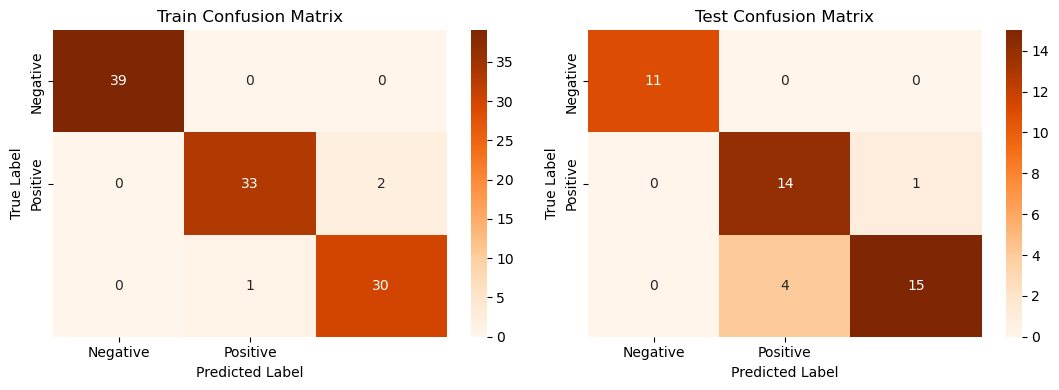


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  39        |
| 1            |    0.970588 | 0.942857 |   0.956522 |  35        |
| 2            |    0.9375   | 0.967742 |   0.952381 |  31        |
| accuracy     |    0.971429 | 0.971429 |   0.971429 |   0.971429 |
| macro avg    |    0.969363 | 0.9702   |   0.969634 | 105        |
| weighted avg |    0.971744 | 0.971429 |   0.971448 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 11        |
| 1            |    0.777778 | 0.933333 |   0.848485 | 15        |
| 2            |    0.9375   | 0.789474 |   0.857143 | 19        |
| accuracy     |    0.888889 | 0.888889 |   0.888889 |  0.8888

In [40]:
# Visualizing evaluation Metric Score chart
lr_score = evaluate_model(lr_model, x_train, x_test, y_train, y_test)

In [41]:
# Updated Evaluation metric Score Chart
score['Logistic regression'] = lr_score
score

,Logistic regression
Precision Train,0.971744
Precision Test,0.899537
Recall Train,0.971429
Recall Test,0.888889
Accuracy Train,0.971429
Accuracy Test,0.888889
F1 macro Train,0.971448
F1 macro Test,0.889177


#### 2. Cross- Validation & Hyperparameter Tuning

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'C': [100,10,1,0.1,0.01,0.001,0.0001],
              'penalty': ['l1', 'l2'],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# Initializing the logistic regression model
logreg = LogisticRegression(fit_intercept=True, max_iter=10000, random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=4, random_state=0)

# Using GridSearchCV to tune the hyperparameters using cross-validation
grid = GridSearchCV(logreg, param_grid, cv=rskf)
grid.fit(x_train, y_train)

# Select the best hyperparameters found by GridSearchCV
best_params = grid.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'C': 10, 'penalty': 'l2', 'solver': 'sag'}


In [44]:
# Initiate model with best parameters
lr_model2 = LogisticRegression(C=best_params['C'],
                                  penalty=best_params['penalty'],
                                  solver=best_params['solver'],
                                  max_iter=10000, random_state=0)


Confusion Matrix:


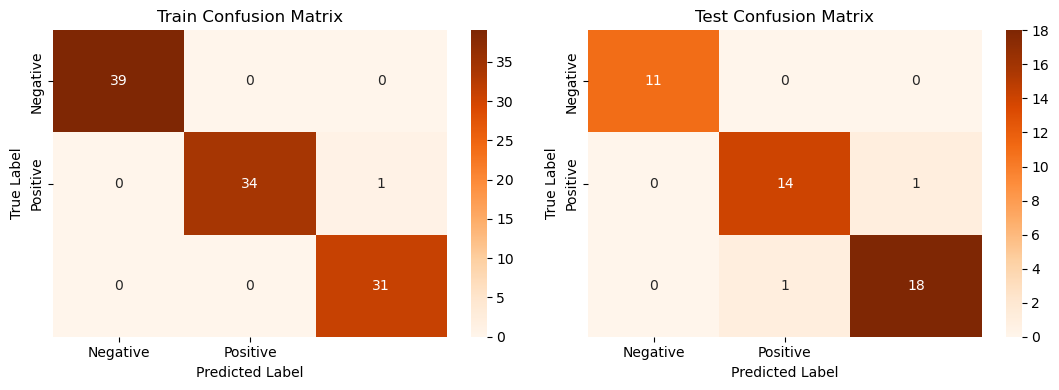


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  39        |
| 1            |    1        | 0.971429 |   0.985507 |  35        |
| 2            |    0.96875  | 1        |   0.984127 |  31        |
| accuracy     |    0.990476 | 0.990476 |   0.990476 |   0.990476 |
| macro avg    |    0.989583 | 0.990476 |   0.989878 | 105        |
| weighted avg |    0.990774 | 0.990476 |   0.990483 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 11        |
| 1            |    0.933333 | 0.933333 |   0.933333 | 15        |
| 2            |    0.947368 | 0.947368 |   0.947368 | 19        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.9555

In [45]:
# Visualizing evaluation Metric Score chart
lr_score2 = evaluate_model(lr_model2, x_train, x_test, y_train, y_test)

In [46]:
score['Logistic regression tuned'] = lr_score2

##### Which hyperparameter optimization technique have i used and why?

The hyperparameter optimization technique used is GridSearchCV. GridSearchCV is a method that performs an exhaustive search over a specified parameter grid to find the best hyperparameters for a model. It is a popular method for hyperparameter tuning because it is simple to implement and can be effective in finding good hyperparameters for a model.

The choice of hyperparameter optimization technique depends on various factors such as the size of the parameter space, the computational resources available, and the time constraints. GridSearchCV can be a good choice when the parameter space is relatively small and computational resources are not a major concern.

##### Have i seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [50]:
# Updated Evaluation metric Score Chart
score

,Logistic regression,Logistic regression tuned
Precision Train,0.971744,0.990774
Precision Test,0.899537,0.955556
Recall Train,0.971429,0.990476
Recall Test,0.888889,0.955556
Accuracy Train,0.971429,0.990476
Accuracy Test,0.888889,0.955556
F1 macro Train,0.971448,0.990483
F1 macro Test,0.889177,0.955556


It appears that hyperparameter tuning did not improve the performance of the Logistic Regression model on the test set. The precision, recall, accuracy and F1 scores on the test set are same for both tuned and untuned Logistic Regression models.

### ML Model - 2 : Decision Tree

In [53]:
# ML Model - 2 Implementation
dt_model = DecisionTreeClassifier(random_state=20)

# Model is trained (fit) and predicted in the evaluate model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Confusion Matrix:


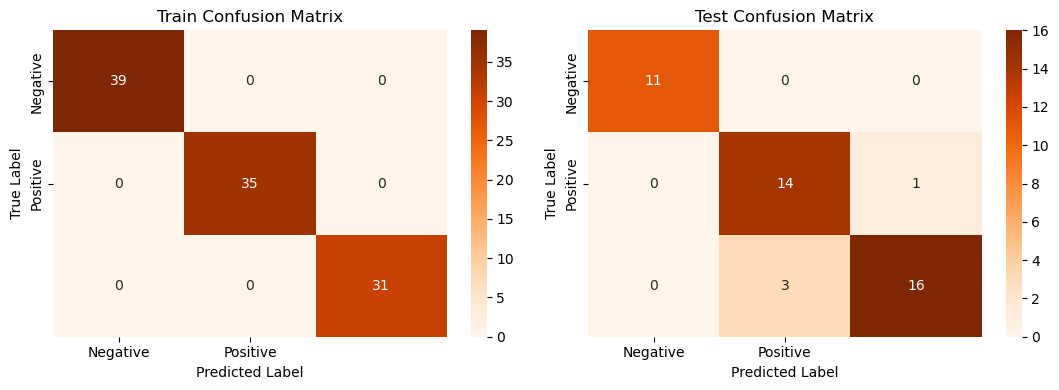


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        39 |
| 1            |           1 |        1 |          1 |        35 |
| 2            |           1 |        1 |          1 |        31 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 11        |
| 1            |    0.823529 | 0.933333 |   0.875    | 15        |
| 2            |    0.941176 | 0.842105 |   0.888889 | 19        |
| accuracy     |    0.911111 | 0.911111 |   0.911111 |  0.911111 |
| m

In [55]:
# Visualizing evaluation Metric Score chart
dt_score = evaluate_model(dt_model, x_train, x_test, y_train, y_test)

In [56]:
# Updated Evaluation metric Score Chart
score['Decision Tree'] = dt_score
score

,Logistic regression,Logistic regression tuned,Decision Tree
Precision Train,0.971744,0.990774,1.000000
Precision Test,0.899537,0.955556,0.916340
Recall Train,0.971429,0.990476,1.000000
Recall Test,0.888889,0.955556,0.911111
Accuracy Train,0.971429,0.990476,1.000000
Accuracy Test,0.888889,0.955556,0.911111
F1 macro Train,0.971448,0.990483,1.000000
F1 macro Test,0.889177,0.955556,0.911420


#### 2. Cross- Validation & Hyperparameter Tuning

In [58]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
grid = {'max_depth' : [3,4,5,6,7,8],
        'min_samples_split' : np.arange(2,8),
        'min_samples_leaf' : np.arange(10,20)}

# Initialize the model
model = DecisionTreeClassifier()

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(model, grid, cv=rskf)

# Fit the GridSearchCV to the training data
grid_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [59]:
# Train a new model with the best hyperparameters
dt_model2 = DecisionTreeClassifier(max_depth=best_params['max_depth'],
                                 min_samples_leaf=best_params['min_samples_leaf'],
                                 min_samples_split=best_params['min_samples_split'],
                                 random_state=20)


Confusion Matrix:


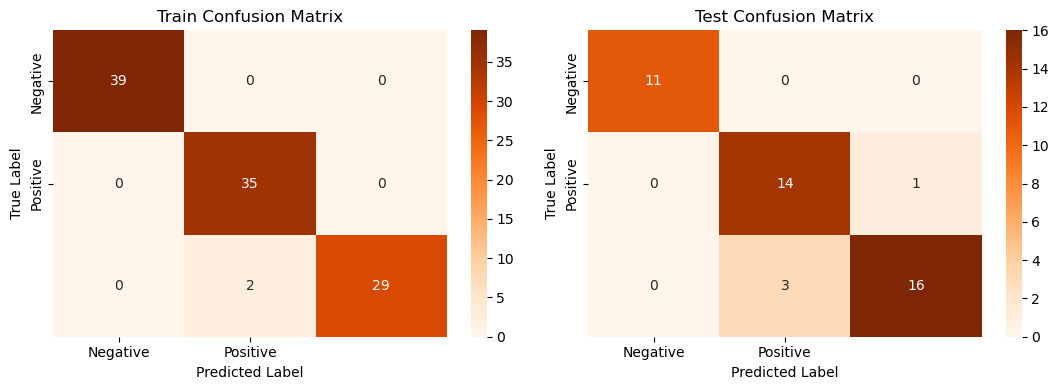


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  39        |
| 1            |    0.945946 | 1        |   0.972222 |  35        |
| 2            |    1        | 0.935484 |   0.966667 |  31        |
| accuracy     |    0.980952 | 0.980952 |   0.980952 |   0.980952 |
| macro avg    |    0.981982 | 0.978495 |   0.97963  | 105        |
| weighted avg |    0.981982 | 0.980952 |   0.980899 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 11        |
| 1            |    0.823529 | 0.933333 |   0.875    | 15        |
| 2            |    0.941176 | 0.842105 |   0.888889 | 19        |
| accuracy     |    0.911111 | 0.911111 |   0.911111 |  0.9111

In [60]:
# Visualizing evaluation Metric Score chart
dt2_score = evaluate_model(dt_model2, x_train, x_test, y_train, y_test)

In [61]:
score['Decision Tree tuned'] = dt2_score

##### Which hyperparameter optimization technique have i used and why?
The hyperparameter optimization technique used is GridSearchCV. GridSearchCV is a method that performs an exhaustive search over a specified parameter grid to find the best hyperparameters for a model. It is a popular method for hyperparameter tuning because it is simple to implement and can be effective in finding good hyperparameters for a model.

The choice of hyperparameter optimization technique depends on various factors such as the size of the parameter space, the computational resources available, and the time constraints. GridSearchCV can be a good choice when the parameter space is relatively small and computational resources are not a major concern.

##### Have i seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [63]:
# Updated Evaluation metric Score Chart
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned
Precision Train,0.971744,0.990774,1.000000,0.981982
Precision Test,0.899537,0.955556,0.916340,0.916340
Recall Train,0.971429,0.990476,1.000000,0.980952
Recall Test,0.888889,0.955556,0.911111,0.911111
Accuracy Train,0.971429,0.990476,1.000000,0.980952
Accuracy Test,0.888889,0.955556,0.911111,0.911111
F1 macro Train,0.971448,0.990483,1.000000,0.980899
F1 macro Test,0.889177,0.955556,0.911420,0.911420


### ML Model - 3 : Naive Bayes

In [65]:
# ML Model - 6 Implementation
nb_model = GaussianNB()

# Model is trained (fit) and predicted in the evaluate model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Confusion Matrix:


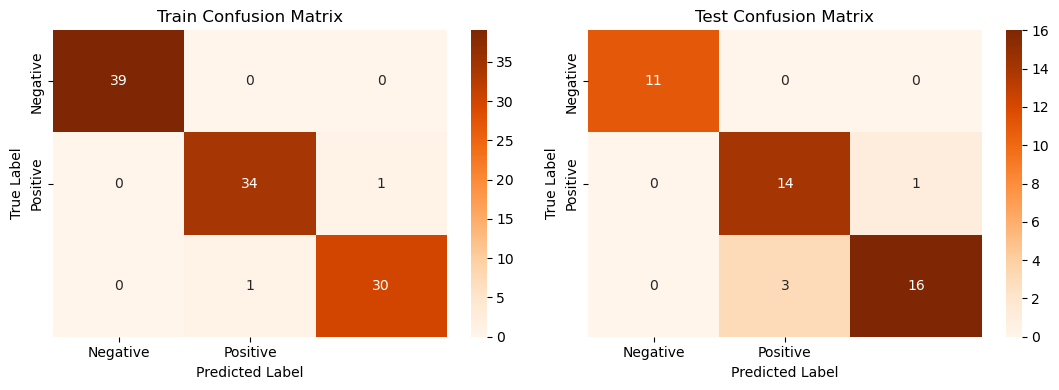


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  39        |
| 1            |    0.971429 | 0.971429 |   0.971429 |  35        |
| 2            |    0.967742 | 0.967742 |   0.967742 |  31        |
| accuracy     |    0.980952 | 0.980952 |   0.980952 |   0.980952 |
| macro avg    |    0.979724 | 0.979724 |   0.979724 | 105        |
| weighted avg |    0.980952 | 0.980952 |   0.980952 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 11        |
| 1            |    0.823529 | 0.933333 |   0.875    | 15        |
| 2            |    0.941176 | 0.842105 |   0.888889 | 19        |
| accuracy     |    0.911111 | 0.911111 |   0.911111 |  0.9111

In [67]:
# Visualizing evaluation Metric Score chart
nb_score = evaluate_model(nb_model, x_train, x_test, y_train, y_test)

In [68]:
# Updated Evaluation metric Score Chart
score['Naive Bayes'] = nb_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Naive Bayes
Precision Train,0.971744,0.990774,1.000000,0.981982,0.980952
Precision Test,0.899537,0.955556,0.916340,0.916340,0.916340
Recall Train,0.971429,0.990476,1.000000,0.980952,0.980952
Recall Test,0.888889,0.955556,0.911111,0.911111,0.911111
Accuracy Train,0.971429,0.990476,1.000000,0.980952,0.980952
Accuracy Test,0.888889,0.955556,0.911111,0.911111,0.911111
F1 macro Train,0.971448,0.990483,1.000000,0.980899,0.980952
F1 macro Test,0.889177,0.955556,0.911420,0.911420,0.911420


#### 2. Cross- Validation & Hyperparameter Tuning

In [70]:
# ML Model - 6 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

# Initialize the model
naive = GaussianNB()

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=4, n_repeats=4, random_state=0)

# Initialize GridSearchCV
GridSearch = GridSearchCV(naive, param_grid, cv=rskf, n_jobs=-1)

# Fit the GridSearchCV to the training data
GridSearch.fit(x_train, y_train)

# Select the best hyperparameters
best_params = GridSearch.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'var_smoothing': 0.003511191734215131}


In [71]:
# Initiate model with best parameters
nb_model2 = GaussianNB(var_smoothing = best_params['var_smoothing'])


Confusion Matrix:


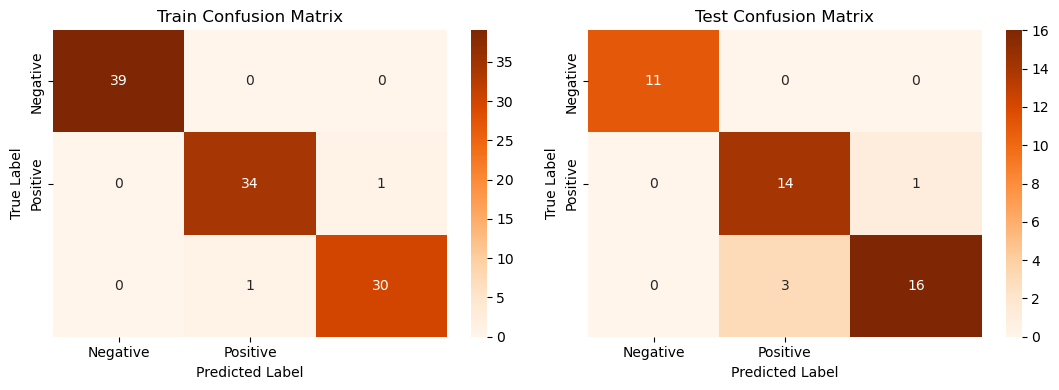


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  39        |
| 1            |    0.971429 | 0.971429 |   0.971429 |  35        |
| 2            |    0.967742 | 0.967742 |   0.967742 |  31        |
| accuracy     |    0.980952 | 0.980952 |   0.980952 |   0.980952 |
| macro avg    |    0.979724 | 0.979724 |   0.979724 | 105        |
| weighted avg |    0.980952 | 0.980952 |   0.980952 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 11        |
| 1            |    0.823529 | 0.933333 |   0.875    | 15        |
| 2            |    0.941176 | 0.842105 |   0.888889 | 19        |
| accuracy     |    0.911111 | 0.911111 |   0.911111 |  0.9111

In [72]:
# Visualizing evaluation Metric Score chart
nb2_score = evaluate_model(nb_model2, x_train, x_test, y_train, y_test)

In [73]:
score['Naive Bayes tuned']= nb2_score

##### Which hyperparameter optimization technique have i used and why?
Here we have used the GridSearchCV for optimization of the Naive Bayes model.

GridSearchCV is an exhaustive search method that tries all possible combinations of hyperparameters specified in the hyperparameter grid. This technique can be useful when the number of hyperparameters to tune is small and the range of possible values for each hyperparameter is limited. GridSearchCV can find the best combination of hyperparameters, but it can be computationally expensive for large hyperparameter grids.

##### Have i seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [75]:
# Updated Evaluation metric Score Chart
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Naive Bayes,Naive Bayes tuned
Precision Train,0.971744,0.990774,1.000000,0.981982,0.980952,0.980952
Precision Test,0.899537,0.955556,0.916340,0.916340,0.916340,0.916340
Recall Train,0.971429,0.990476,1.000000,0.980952,0.980952,0.980952
Recall Test,0.888889,0.955556,0.911111,0.911111,0.911111,0.911111
Accuracy Train,0.971429,0.990476,1.000000,0.980952,0.980952,0.980952
Accuracy Test,0.888889,0.955556,0.911111,0.911111,0.911111,0.911111
F1 macro Train,0.971448,0.990483,1.000000,0.980899,0.980952,0.980952
F1 macro Test,0.889177,0.955556,0.911420,0.911420,0.911420,0.911420


In [76]:
print(score.to_markdown())

|                 |   Logistic regression |   Logistic regression tuned |   Decision Tree |   Decision Tree tuned |   Naive Bayes |   Naive Bayes tuned |
|:----------------|----------------------:|----------------------------:|----------------:|----------------------:|--------------:|--------------------:|
| Precision Train |              0.971744 |                    0.990774 |        1        |              0.981982 |      0.980952 |            0.980952 |
| Precision Test  |              0.899537 |                    0.955556 |        0.91634  |              0.91634  |      0.91634  |            0.91634  |
| Recall Train    |              0.971429 |                    0.990476 |        1        |              0.980952 |      0.980952 |            0.980952 |
| Recall Test     |              0.888889 |                    0.955556 |        0.911111 |              0.911111 |      0.911111 |            0.911111 |
| Accuracy Train  |              0.971429 |                    0.990476 |   

## ***Selection of best model***

In [78]:
# Removing the overfitted models which have precision, recall, f1 scores for train as 1
score_t = score.transpose()            # taking transpose of the score dataframe to create new difference column
remove_models = score_t[score_t['Recall Train']>=0.98].index  # creating a list of models which have 1 for train and score_t['Accuracy Train']==1.0 and score_t['Precision Train']==1.0 and score_t['F1 macro Train']==1.0
remove_models

adj = score_t.drop(remove_models)                     # creating a new dataframe with required models
adj

,Precision Train,Precision Test,Recall Train,Recall Test,Accuracy Train,Accuracy Test,F1 macro Train,F1 macro Test
Logistic regression,0.971744,0.899537,0.971429,0.888889,0.971429,0.888889,0.971448,0.889177


In [79]:
def select_best_model(df, metrics):

    best_models = {}
    for metric in metrics:
        max_test = df[metric + ' Test'].max()
        best_model_test = df[df[metric + ' Test'] == max_test].index[0]
        best_model = best_model_test
        best_models[metric] = best_model
    return best_models

In [80]:
metrics = ['Precision', 'Recall', 'Accuracy', 'F1 macro']

best_models = select_best_model(adj, metrics)
print("The best models are:")
for metric, best_model in best_models.items():
    print(f"{metric}: {best_model} - {adj[metric+' Test'][best_model].round(4)}")
    Recall_Best_Model = best_model
print(Recall_Best_Model)

The best models are:
Precision: Logistic regression - 0.8995
Recall: Logistic regression - 0.8889
Accuracy: Logistic regression - 0.8889
F1 macro: Logistic regression - 0.8892
Logistic regression


In [81]:
# Take recall as the primary evaluation metric
score_smpl = score.transpose()
remove_overfitting_models = score_smpl[score_smpl['Recall Train']>=0.98].index
remove_overfitting_models
new_score = score_smpl.drop(remove_overfitting_models)
new_score = new_score.drop(['Precision Train','Precision Test','Accuracy Train','Accuracy Test','F1 macro Train','F1 macro Test'], axis=1)
new_score.index.name = 'Classification Model'
print(new_score.to_markdown())

| Classification Model   |   Recall Train |   Recall Test |
|:-----------------------|---------------:|--------------:|
| Logistic regression    |       0.971429 |      0.888889 |


In [82]:
best_model_row = adj.loc[adj['Recall Test'].idxmax()]

In [83]:
# Define a list of category labels for reference.
Category_RF = ['Iris-Setosa', 'Iris-Versicolor', 'Iris-Virginica']

In [84]:
# In this example, it's a data point with Sepal Length, Sepal Width, Petal Length, and Petal Width.
x_rf = np.array([[5.1, 3.5, 1.4, 0.2]])

def ChooseBestModel(Best_Model):
    match Best_Model:
        case "Logistic regression":
            return lr_model
        case "Decision Tree":
            return dt_model2       
        case _:
            return nb_model2

# Use the tuned random forest model (rf_model2) to make a prediction.
# x_rf_prediction = nb_model2.predict(x_rf)
bestPerformingModel = ChooseBestModel(Recall_Best_Model)
x_rf_prediction = bestPerformingModel.predict(x_rf)
x_rf_prediction[0]
# Display the predicted category label.
print(Category_RF[int(x_rf_prediction[0])])

Iris-Setosa


In [85]:
import pickle
filename = "savemodelgridsearchcv.sav"
pickle.dump(bestPerformingModel, open(filename, "wb"))

In [86]:
bestPerformingModel

LogisticRegression(max_iter=10000)

In [87]:
load_model_gridsearchcv = pickle.load(open(filename, "rb"))

In [88]:
load_model = pickle.load(open(filename, "rb"))

In [89]:
Category_RF[int(load_model.predict([[6.3, 2.3, 4.4, 1.3]]))]

'Iris-Versicolor'